In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='lk2'

In [2]:
import lightkurve as lk
%matplotlib inline

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/jp/.lightkurve/cache. Please move all the files in the legacy directory /home/jp/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [4]:
import pandas as pd

df_resonant = pd.read_csv('../data/tics_resonance_from_toi.csv', index_col=0)
df_resonant

,tic,1st order,2nd order
0,425997655,True,True
1,142276270,True,True
2,150428135,True,True
3,29781292,True,True
4,269701147,True,True
5,307210830,True,True
6,54962195,True,True
7,318022259,True,True
8,259377017,True,True
9,441798995,True,True


In [5]:
import sys
sys.path.insert(0, '../code')
from utils import get_tois

df = get_tois()

Loaded:  ../data/TOIs.csv


In [6]:
tic = 54962195
d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
d[["Period (days)","Epoch (BJD)"]]

,Period (days),Epoch (BJD)
473,2.598905,2.458544e+06
474,4.695567,2.458543e+06
475,7.102747,2.458547e+06


In [7]:
result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
lc = result.download_all().stitch()

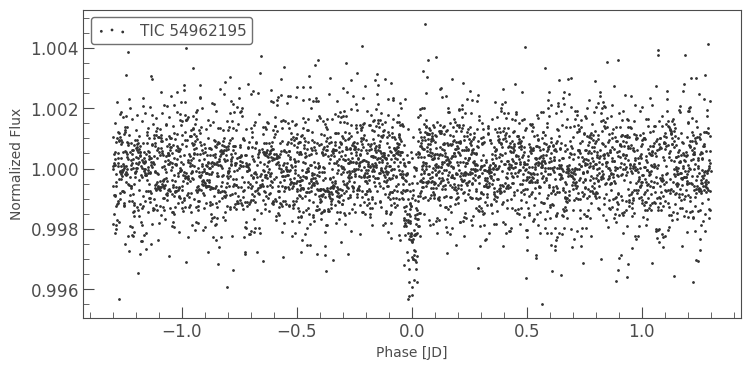

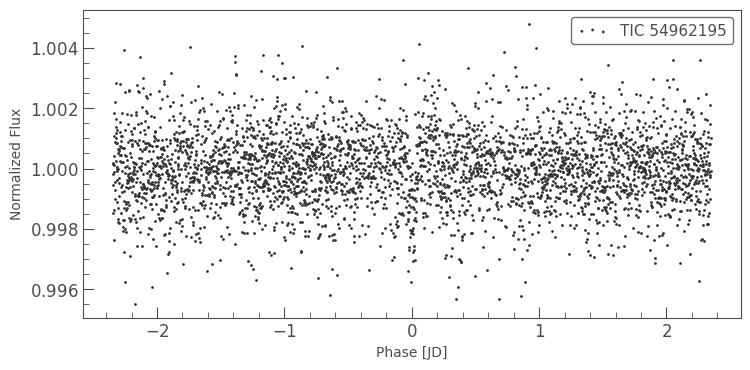

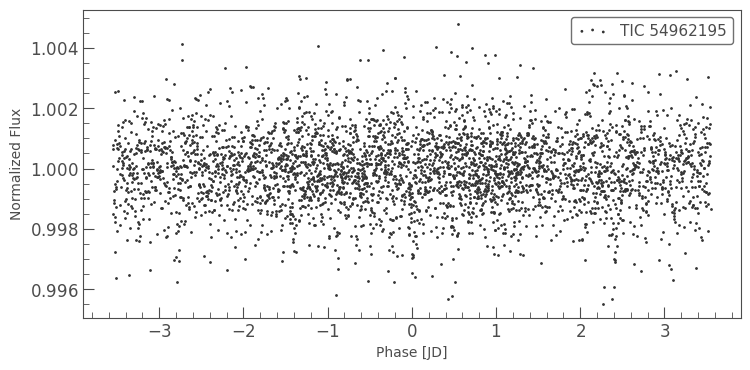

In [9]:
for i,row in d.iterrows():
    p, t0 = row["Period (days)"], row["Epoch (BJD)"] - 2457000
    fold = lc.flatten().fold(period=p, epoch_time=t0)
    ax = fold.scatter()

## check signs of Prot

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 21 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jp/miniconda3/envs/lk2/lib/python3.10/s

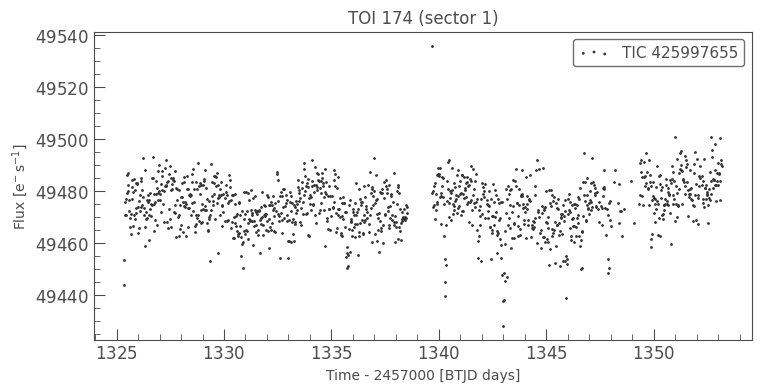

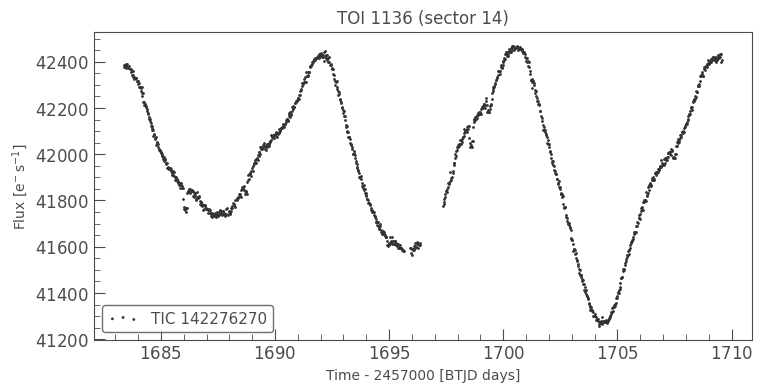

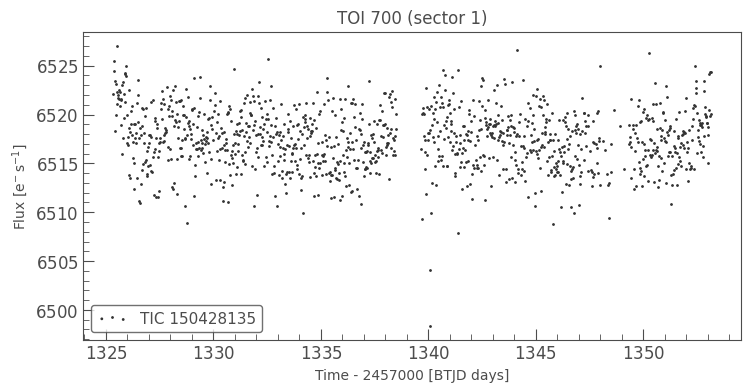

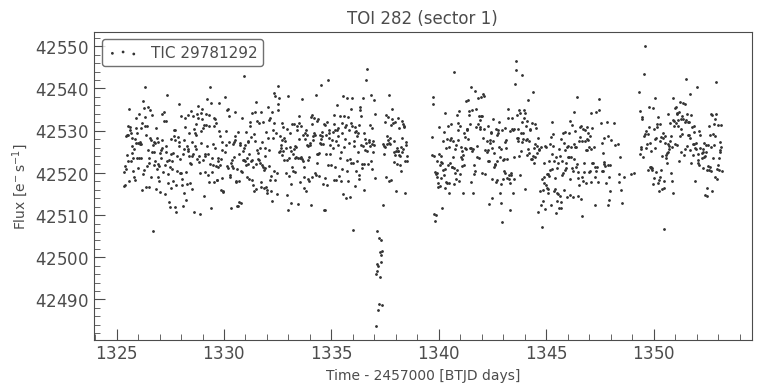

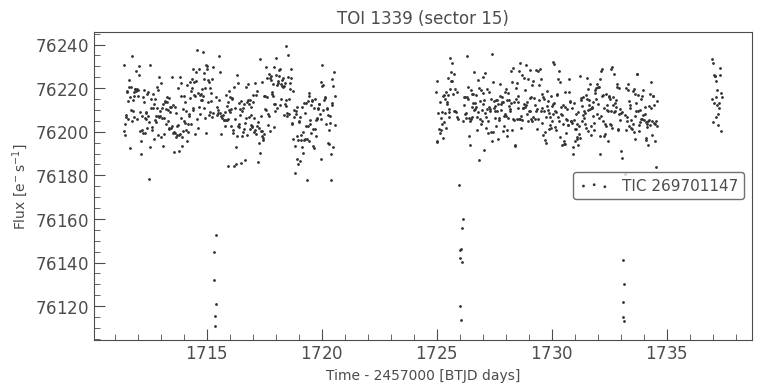

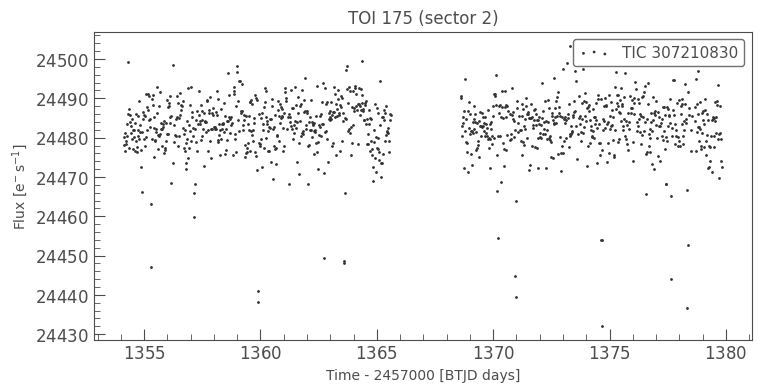

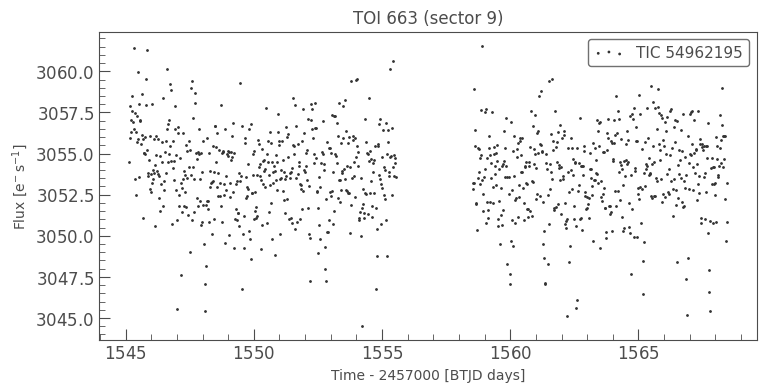

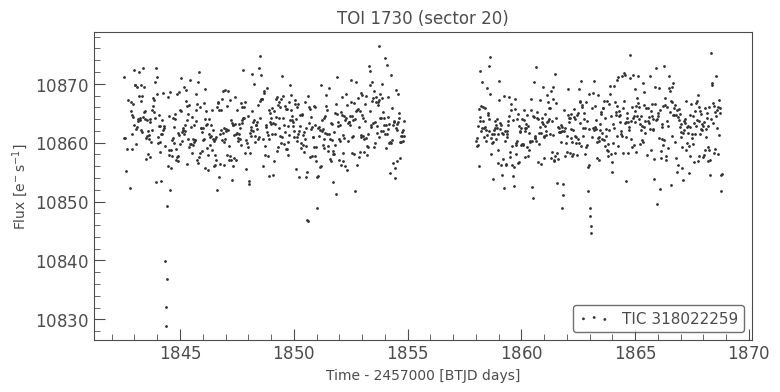

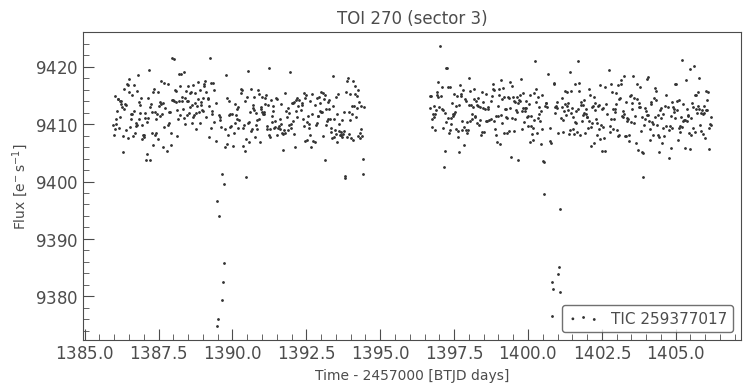

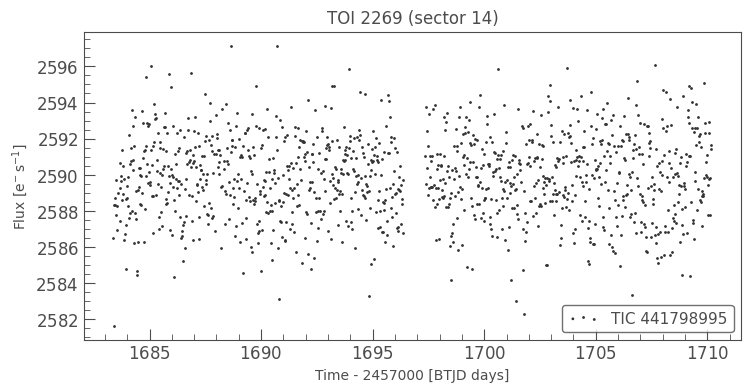

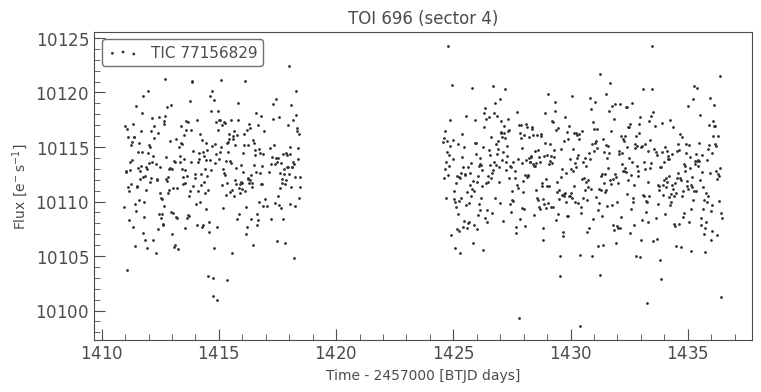

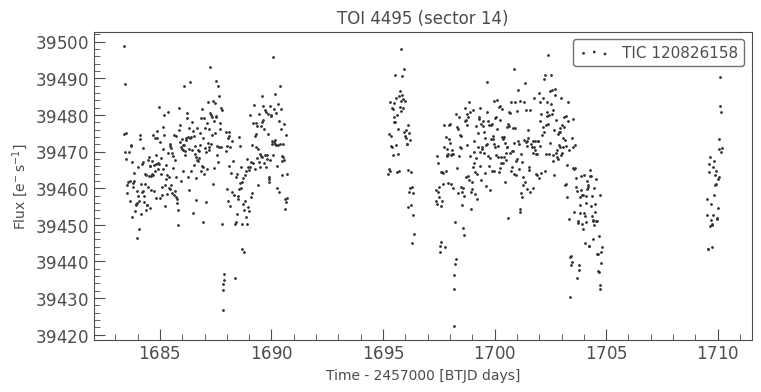

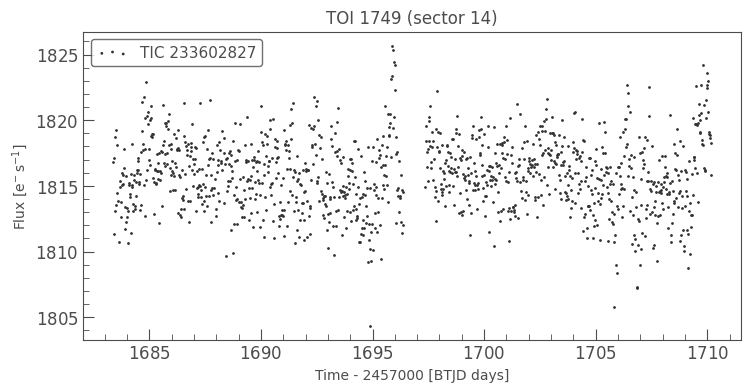

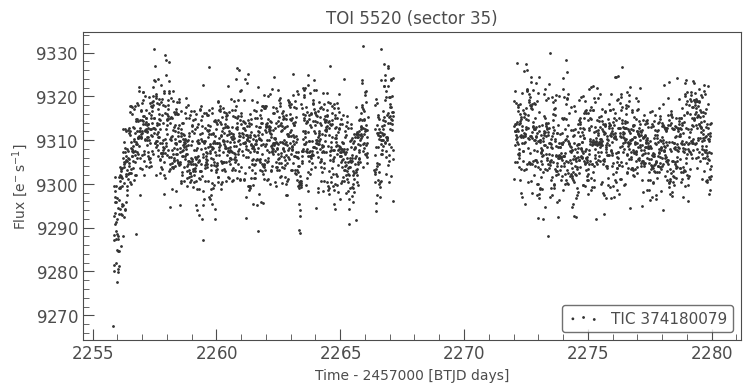

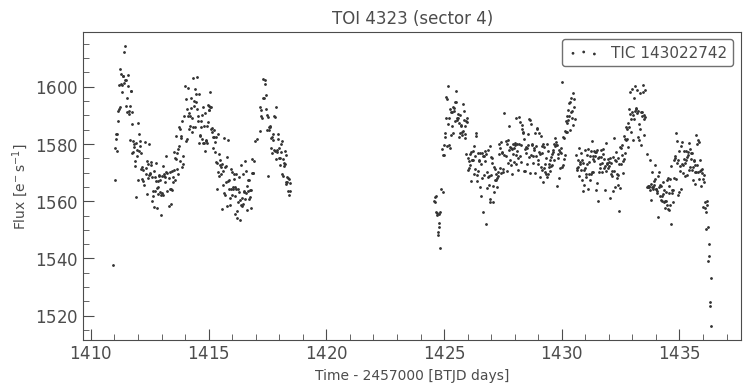

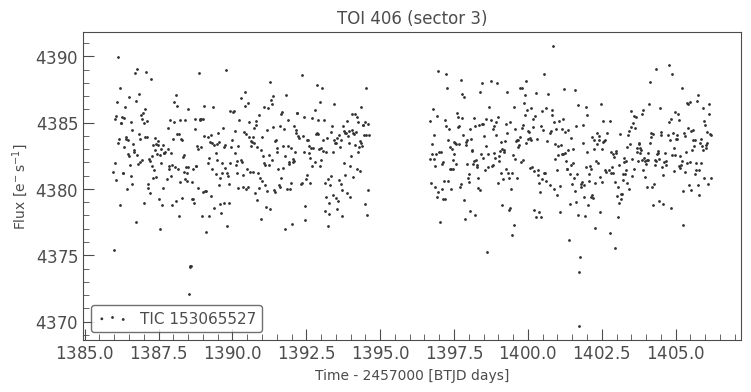

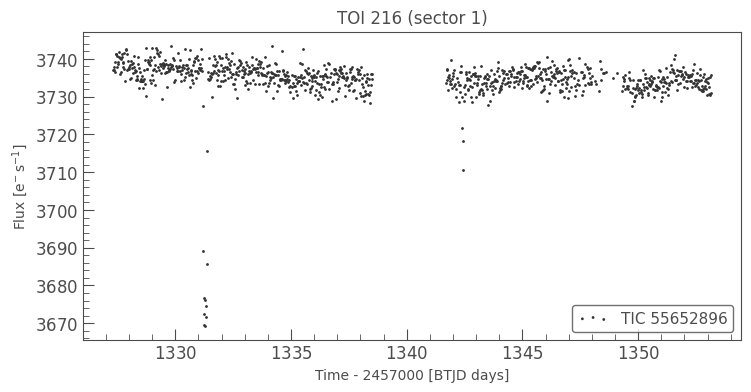

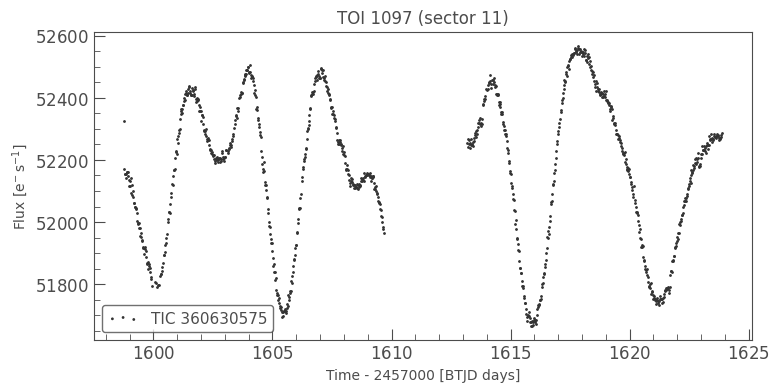

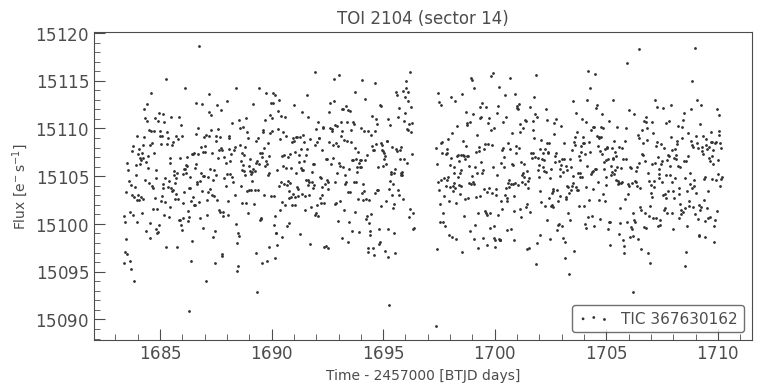

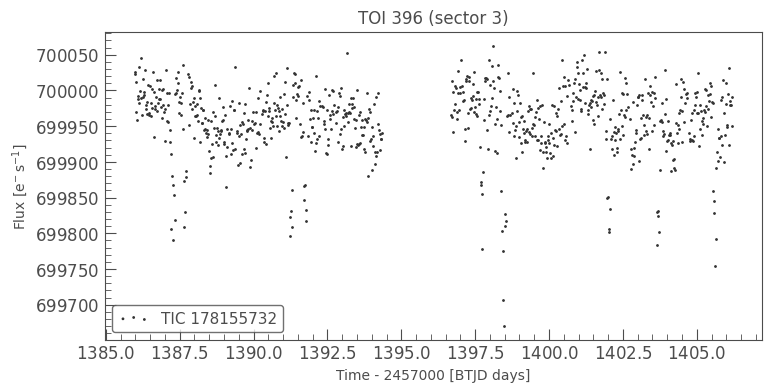

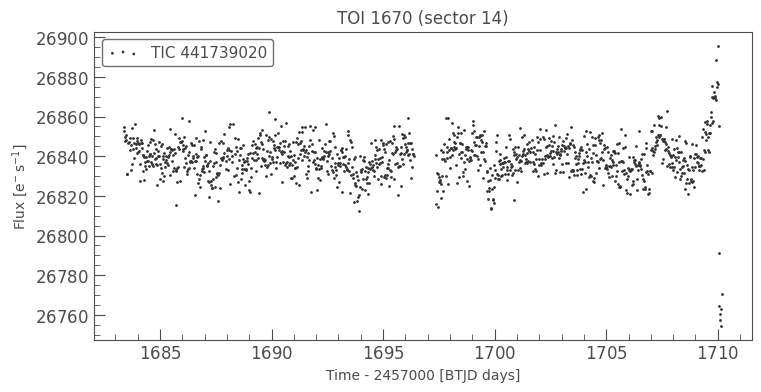

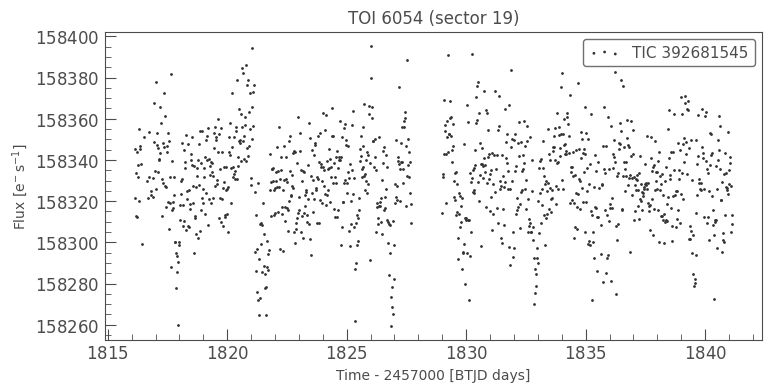

In [10]:
multi_sector = False

for i,row in df_resonant.iterrows(): 
    tic = row['tic']
    d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
    toi = str(d.TOI.iloc[0]).split('.')[0]
    result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
    if result:
        if multi_sector:
            lc = result.download_all().stitch()
        else:
            lc = result.download()
        ax = lc.scatter()
        ax.set_title(f"TOI {toi} (sector {lc.sector})")

1136, 4323, 1097

## check transit signal

/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


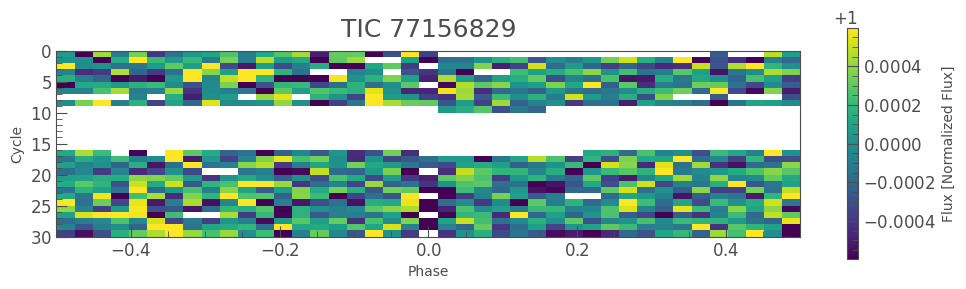

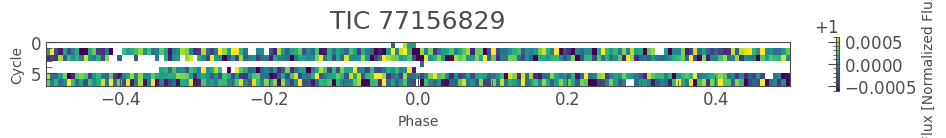

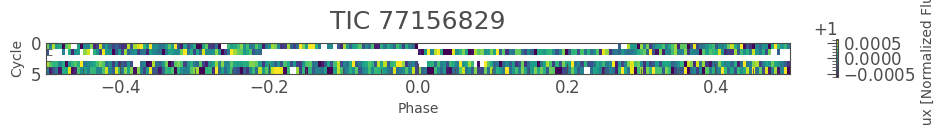

In [82]:
multi_sector = False

for i,row in df_resonant.iloc[2:4].iterrows(): 
    tic = row['tic']
    d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
    result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
    if result:
        if multi_sector:
            lc = result.download_all().stitch()
        else:
            lc = result.download()
        flat = lc.flatten()
        for i,row in d.iterrows():
            p, t0 = row["Period (days)"], row["Epoch (BJD)"]-2457000
            fold = flat.fold(period=p, epoch_time=t0)
            ax = fold.scatter(label=f"TOI {row['TOI']}")
            ax.set_title(f"P={p:.2f}d")
            if False:
                fold.plot_river();
    break